# AED - Proyecto III

**Autores:**
- Leopoldo Muñoz
- Valentina Yáñez

---

In [19]:
# Configuración inicial
import warnings
warnings.filterwarnings('ignore')

# Configurar pandas para mostrar más columnas y filas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Configurar matplotlib para mejores gráficos
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

import numpy as np
import scipy
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics, decomposition, cluster, ensemble
from sklearn.linear_model import LinearRegression
import imblearn
import nbconvert



In [20]:
# Cargar el dataset desde .data/online_shoppers_intention.csv
df = pd.read_csv('data/online_shoppers_intention.csv')

# Verificar variables categóricas del dataset
print("\nOtras variables categóricas existentes:")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Variables categóricas: {categorical_cols}")

# Convertir Month y VisitorType de object a categorical
if 'Month' in df.columns:
    df['Month'] = df['Month'].astype('category')
if 'VisitorType' in df.columns:
    df['VisitorType'] = df['VisitorType'].astype('category')

# Mostrar las primeras filas del dataset
df.head()


Otras variables categóricas existentes:
Variables categóricas: ['Month', 'VisitorType', 'Weekend', 'Revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Contexto

La información utilizada en este proyecto proviene del UCI Machine Learning Repository y fue recopilada en el año 2018. El objetivo principal del dataset es predecir la intención de compra de los usuarios durante sus sesiones de navegación en una tienda en línea. Los datos se recolectaron en tiempo real mediante analítica web (Google Analytics) y se respetó que cada fila represente un usuario diferente, evitando la dependencia temporal entre sesiones.

El conjunto de datos contiene 12,330 registros, cada uno representando una sesión única de usuario. Presenta un balance de clases donde el 84.5% de las sesiones no terminan en compra y el 15.5% sí lo hacen. El período de observación abarca un año completo, lo que permite evitar sesgos relacionados con campañas o eventos específicos.

Se considera útil para aplicar técnicas de clasificación, detección de outliers y clustering no supervisado.

## Estructura general

| Tipo             | Cantidad                |
|------------------|------------------------|
| Instancias       | 12,330                 |
| Atributos        | 18                     |
| Atributo clase   | 1 (Revenue)            |
| Tipo de datos    | Mixto (numérico y categórico) |
| Valores faltantes| No                     |


## Atributos

| Atributo                  | Tipo        | Descripción                                                                                   |
|---------------------------|-------------|-----------------------------------------------------------------------------------------------|
| Administrative            | Entero      | N.º de páginas administrativas visitadas (como política de privacidad, contactos, etc.).      |
| Administrative_Duration   | Real        | Tiempo total (segundos) en páginas administrativas.                                           |
| Informational             | Entero      | N.º de páginas informativas (por ejemplo, ayuda o preguntas frecuentes).                      |
| Informational_Duration    | Real        | Tiempo total en páginas informativas.                                                         |
| ProductRelated            | Entero      | N.º de páginas de productos visitadas.                                                        |
| ProductRelated_Duration   | Real        | Tiempo total en páginas de productos.                                                         |
| BounceRates               | Real        | Porcentaje de usuarios que abandonan el sitio tras visitar solo una página.                   |
| ExitRates                 | Real        | Porcentaje de veces que una página fue la última visitada en la sesión.                       |
| PageValues                | Real        | Valor promedio de las páginas visitadas antes de una conversión.                              |
| SpecialDay                | Real        | Proximidad a fechas especiales (por ejemplo, Día de San Valentín), valores de 0 a 1.          |
| Month                     | Categórico  | Mes de la visita (por ejemplo, "Feb", "Mar").                                                 |
| OperatingSystems          | Entero  | Sistema operativo utilizado.                                                                  |
| Browser                   | Entero  | Navegador web utilizado.                                                                      |
| Region                    | Entero  | Región geográfica del usuario.                                                                |
| TrafficType               | Entero  | Tipo de tráfico de la sesión (directo, referido, etc.).                                       |
| VisitorType               | Categórico  | Visitante nuevo, recurrente u otro.                                                           |
| Weekend                   | Booleano    | Si la visita fue durante el fin de semana (TRUE o FALSE).                                     |
| Revenue                   | Booleano    | Variable objetivo. Si la sesión terminó en compra (TRUE) o no (FALSE).                        |

**Observaciones:**

- Como el dataset trae una característica objetivo, esta se debería eliminar para un entrenamiento no supervisado, pero puede ser útil más adelante para contrastar resultados.
- Las características enteras `OperatingSystems`, `Browser`, `Region` y `TrafficType` representan en realidad enumeraciones categóricas, por lo que se debe decidir una manera de transformarlas, interpretarlas o incluso eliminarlas.


## Exploración de los datos

In [21]:
# Verificar información básica del dataset
print("Información del dataset:")
print(f"Forma: {df.shape}")
print(f"Tipos de datos originales:")
print(df.dtypes)


Información del dataset:
Forma: (12330, 18)
Tipos de datos originales:
Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object


In [22]:
# Verificar que no haya valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [23]:
# Información de las columnas
print("Información de las columnas:")
print(df.info())

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  int64   
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 n

A continuación, se declaran las variables categóricas enumeradas como categóricas, pues son leídas automáticamente con el tipo entero.

In [24]:
# Convertir variables enteras categóricas a tipo categorical (equivalente a factor en R)
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in categorical_features:
    # Mostrar valores únicos antes de la conversión
    print(f"\n{feature}:")
    print(f"  - Valores únicos: {df[feature].nunique()}")
    print(f"  - Rango: {df[feature].min()} - {df[feature].max()}")
    
    # Convertir a categorical
    df[feature] = df[feature].astype('category')

print("Variables categóricas convertidas:")
print(df[categorical_features].dtypes)



OperatingSystems:
  - Valores únicos: 8
  - Rango: 1 - 8

Browser:
  - Valores únicos: 13
  - Rango: 1 - 13

Region:
  - Valores únicos: 9
  - Rango: 1 - 9

TrafficType:
  - Valores únicos: 20
  - Rango: 1 - 20
Variables categóricas convertidas:
OperatingSystems    category
Browser             category
Region              category
TrafficType         category
dtype: object


In [25]:
print(f"\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object


In [26]:
# Estadísticas descriptivas solo para variables numéricas
print("\nEstadísticas descriptivas (numéricas):")
print(df.describe(include=[np.number]))



Estadísticas descriptivas (numéricas):
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25% 

In [27]:
#Estadísticas descriptivas para variables categóricas
print("\nEstadísticas descriptivas (categóricas):")
print(df.describe(include=['category']))



Estadísticas descriptivas (categóricas):
        Month  OperatingSystems  Browser  Region  TrafficType  \
count   12330             12330    12330   12330        12330   
unique     10                 8       13       9           20   
top       May                 2        2       1            2   
freq     3364              6601     7961    4780         3913   

              VisitorType  
count               12330  
unique                  3  
top     Returning_Visitor  
freq                10551  


## Manejo de datos faltantes y datos atípicos

- **Datos faltantes:** El dataset no presenta datos faltantes.
- **Datos atípicos:** Se realizará una observación sobre la presencia de datos atípicos por medio de diagramas de cajas, y se analizará su influencia por medio del estadístico de Cook.

### Visualización de datos atípicos

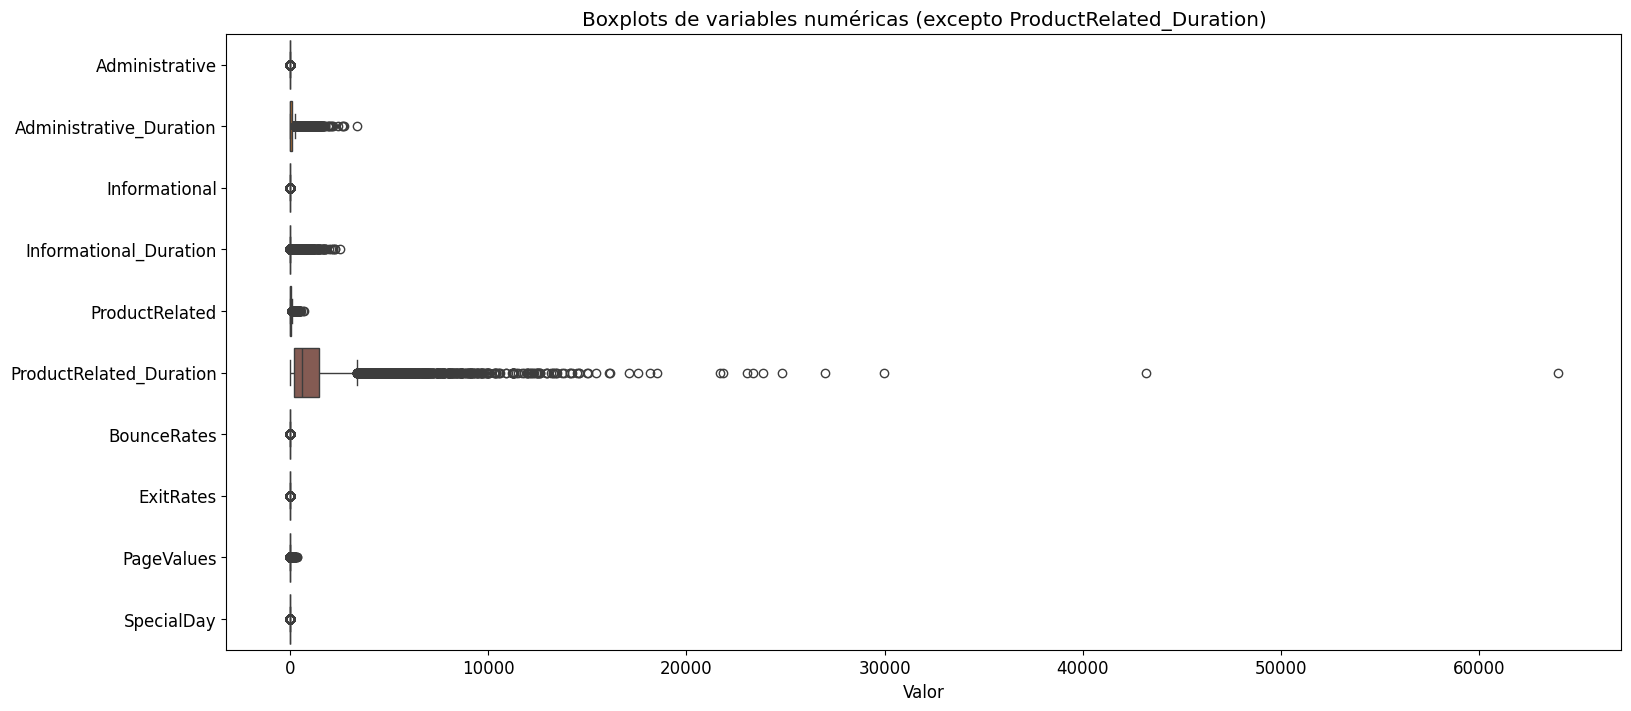

In [28]:
# Visualización de datos atípicos con boxplots

# Seleccionar solo las columnas numéricas para el boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Boxplot de todas las variables numéricas
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplots de variables numéricas (excepto ProductRelated_Duration)')
plt.xlabel('Valor')
plt.show()


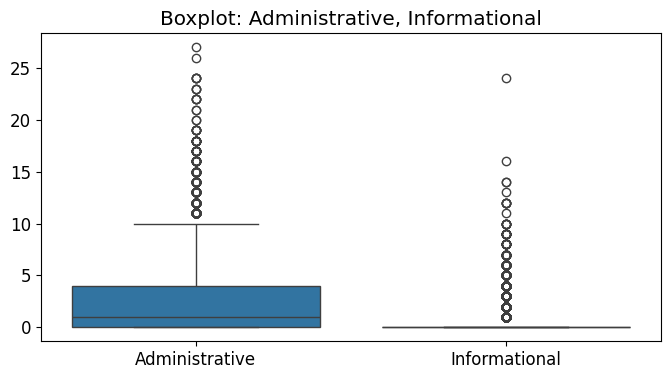

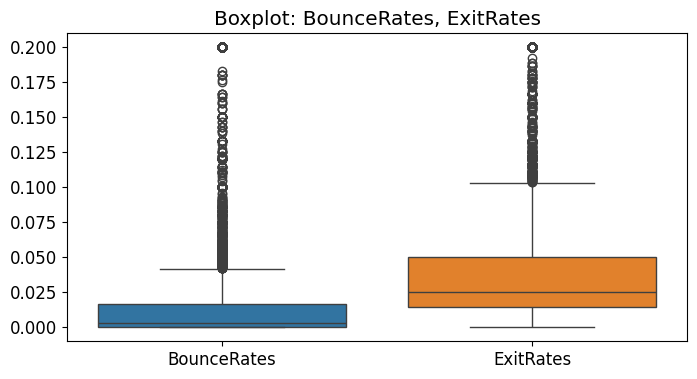

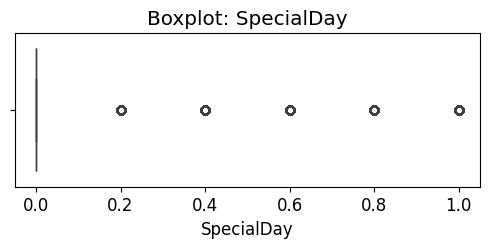

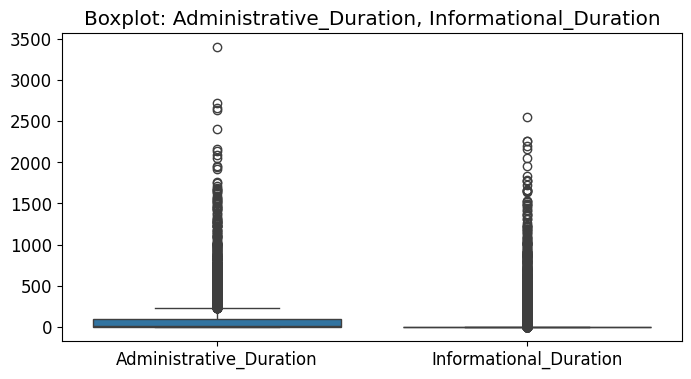

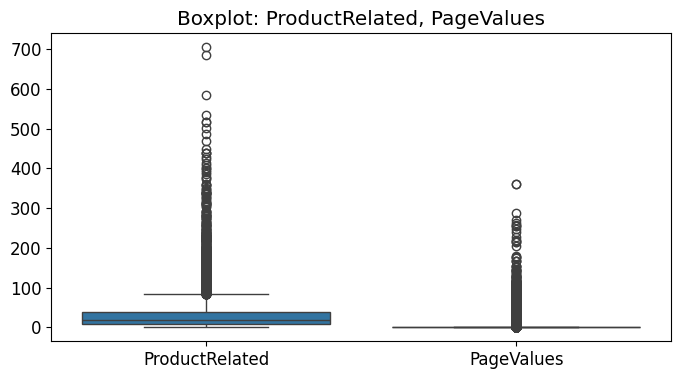

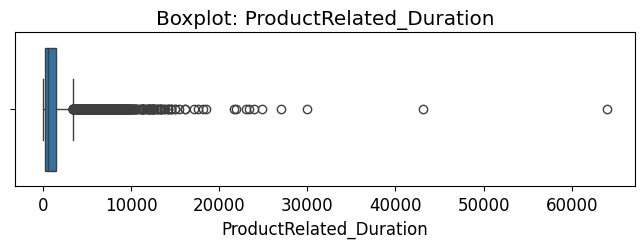

In [29]:
# 1. Boxplot para: Administrative, Informational
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Administrative', 'Informational']])
plt.title('Boxplot: Administrative, Informational')
plt.show()

# 2. Boxplot para: BounceRates, ExitRates
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['BounceRates', 'ExitRates']])
plt.title('Boxplot: BounceRates, ExitRates')
plt.show()

# 3. Boxplot para: SpecialDay
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['SpecialDay'])
plt.title('Boxplot: SpecialDay')
plt.show()

# 4. Boxplot para: Administrative_Duration, Informational_Duration
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Administrative_Duration', 'Informational_Duration']])
plt.title('Boxplot: Administrative_Duration, Informational_Duration')
plt.show()

# 5. Boxplot para: ProductRelated, PageValues
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['ProductRelated', 'PageValues']])
plt.title('Boxplot: ProductRelated, PageValues')
plt.show()

# 6. Boxplot para: ProductRelated_Duration
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['ProductRelated_Duration'])
plt.title('Boxplot: ProductRelated_Duration')
plt.show()


### Análisis con estadístico de Cook

In [33]:
# Análisis de observaciones influyentes usando el estadístico de Cook

influyentes_totales = []

for var in numeric_cols:
    # Definir variables predictoras (todas menos la variable objetivo y categóricas)
    X = df[numeric_cols].drop(columns=[var])
    y = df[var]

    # Ajustar modelo lineal
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Calcular leverage (h_ii)
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X.values])
    hat_matrix = X_with_intercept @ np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
    leverage = np.diag(hat_matrix)

    # Calcular Cook's distance
    mse = np.mean(residuals**2)
    cooks_d = (residuals**2 / (len(X.columns) * mse)) * (leverage / (1 - leverage) ** 2)

    # Identificar observaciones influyentes
    threshold = 4 * np.mean(cooks_d)
    influential = np.where(cooks_d > threshold)[0]
    influyentes_totales.extend(influential)
    cantidad_influyentes = len(influential)
    porcentaje = cantidad_influyentes / len(y) * 100
    print(f"Variable objetivo: {var} - Observaciones influyentes: {cantidad_influyentes} ({porcentaje:.2f}%)")

# Calcular observaciones únicas y muy influyentes
influyentes_totales = np.array(influyentes_totales)
unicos = np.unique(influyentes_totales)
conteos = np.bincount(influyentes_totales)
muy_influyentes = np.sum(conteos > 1)

print(f"\nCantidad de observaciones únicas influyentes: {len(unicos)} ({len(unicos) / len(df) * 100:.2f}%)")
print(f"Cantidad de observaciones muy influyentes: {muy_influyentes} ({muy_influyentes / len(df) * 100:.2f}%)")



Variable objetivo: Administrative - Observaciones influyentes: 213 (1.73%)
Variable objetivo: Administrative_Duration - Observaciones influyentes: 144 (1.17%)
Variable objetivo: Informational - Observaciones influyentes: 169 (1.37%)
Variable objetivo: Informational_Duration - Observaciones influyentes: 173 (1.40%)
Variable objetivo: ProductRelated - Observaciones influyentes: 72 (0.58%)
Variable objetivo: ProductRelated_Duration - Observaciones influyentes: 74 (0.60%)
Variable objetivo: BounceRates - Observaciones influyentes: 1151 (9.33%)
Variable objetivo: ExitRates - Observaciones influyentes: 505 (4.10%)
Variable objetivo: PageValues - Observaciones influyentes: 396 (3.21%)
Variable objetivo: SpecialDay - Observaciones influyentes: 629 (5.10%)

Cantidad de observaciones únicas influyentes: 2179 (17.67%)
Cantidad de observaciones muy influyentes: 716 (5.81%)
